<a href="https://colab.research.google.com/github/Ankush112/none/blob/main/DL_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment 1***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the Boston Housing dataset
df = pd.read_csv('/content/HousingData.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.shape

(394, 14)

Checking correlation with target variable MEDV

In [ ]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.743450
PTRATIO   -0.543809
INDUS     -0.510829
TAX       -0.508864
NOX       -0.459054
RAD       -0.416638
AGE       -0.407470
CRIM      -0.397230
CHAS       0.173701
DIS        0.279547
B          0.347256
ZN         0.406822
RM         0.723951
MEDV       1.000000
Name: MEDV, dtype: float64

In [ ]:
X = df.loc[:,['LSTAT','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape

((394, 2), (394,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)


Normalizing Training and Testing Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Preparing a model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(Dense(128,input_shape=(2,),activation='relu',name='input')) #128 neurons, less neurons so a simple model cuz we dont have much datapoints
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,activation='linear',name='output')) #predicting only one value so we output neuron, linear so ouput data is not lost
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               384       
                                                                 
 layer_1 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=400,validation_split=0.05)


Epoch 1/400
9/9 [==============================] - 1s 33ms/step - loss: 599.7346 - mae: 22.5268 - val_loss: 496.8061 - val_mae: 20.5198
Epoch 2/400
9/9 [==============================] - 0s 10ms/step - loss: 574.7350 - mae: 22.0059 - val_loss: 472.2086 - val_mae: 19.9420
Epoch 3/400
9/9 [==============================] - 0s 9ms/step - loss: 547.7824 - mae: 21.4153 - val_loss: 443.7922 - val_mae: 19.2402
Epoch 4/400
9/9 [==============================] - 0s 9ms/step - loss: 514.8005 - mae: 20.6619 - val_loss: 407.9919 - val_mae: 18.3110
Epoch 5/400
9/9 [==============================] - 0s 10ms/step - loss: 470.5490 - mae: 19.6376 - val_loss: 362.1727 - val_mae: 17.0436
Epoch 6/400
9/9 [==============================] - 0s 10ms/step - loss: 414.0244 - mae: 18.3023 - val_loss: 307.2302 - val_mae: 15.4129
Epoch 7/400
9/9 [==============================] - 0s 10ms/step - loss: 346.5703 - mae: 16.6690 - val_loss: 245.7971 - val_mae: 13.3829
Epoch 8/400
9/9 [==============================] -

In [ ]:
output = model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 4ms/step - loss: 10.4181 - mae: 2.5443


In [ ]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 10.418131828308105
Mean Absolute Error: 2.54429292678833


In [ ]:

y_pred = model.predict(x=x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 10.41813169185236
Mean Absolute Error: 2.544293072247746


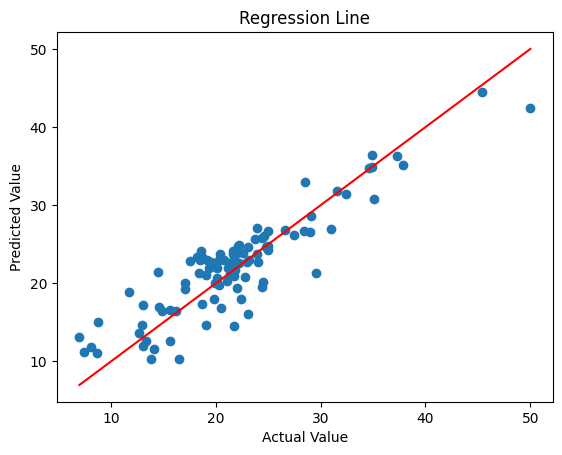

In [ ]:
import matplotlib.pyplot as plt

# Plot the regression line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Regression Line')
plt.show()

**Assignment 2- Classification using CNN**

In [15]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [18]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [19]:
train_df.shape


(471, 785)

In [20]:
test_df.shape

(468, 785)

In [21]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,4.560510,0.029724,0.029724,0.048832,0.106157,0.167728,0.333333,0.615711,1.876858,4.887473,...,32.523404,21.702128,14.331915,14.272340,20.731915,18.421277,10.651064,3.919149,0.968085,0.093617
std,2.820904,0.645086,0.482863,0.505032,0.998608,1.424519,2.679579,6.074965,11.526921,20.032157,...,54.726286,45.035743,36.548832,37.052407,48.454410,46.048843,32.650073,18.935584,8.238518,1.490468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.750000,13.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,14.000000,10.000000,10.000000,20.000000,26.000000,50.000000,121.000000,175.000000,198.000000,...,227.000000,216.000000,219.000000,222.000000,233.000000,237.000000,234.000000,168.000000,112.000000,30.000000


In [22]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Each row represents an grayscale image containing 784 pixels and each pixel having values in range from 0-255
The column label is a discrete value in the range 0 to 9 each value representing a specific category


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Preprocess Data
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [25]:
x_train = train_df.iloc[:,1:].to_numpy() #iloc here, loc in previous
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [26]:
y_train = train_df.iloc[:,0].to_numpy()


In [27]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255


In [28]:
y_test = test_df.iloc[:,0].to_numpy()

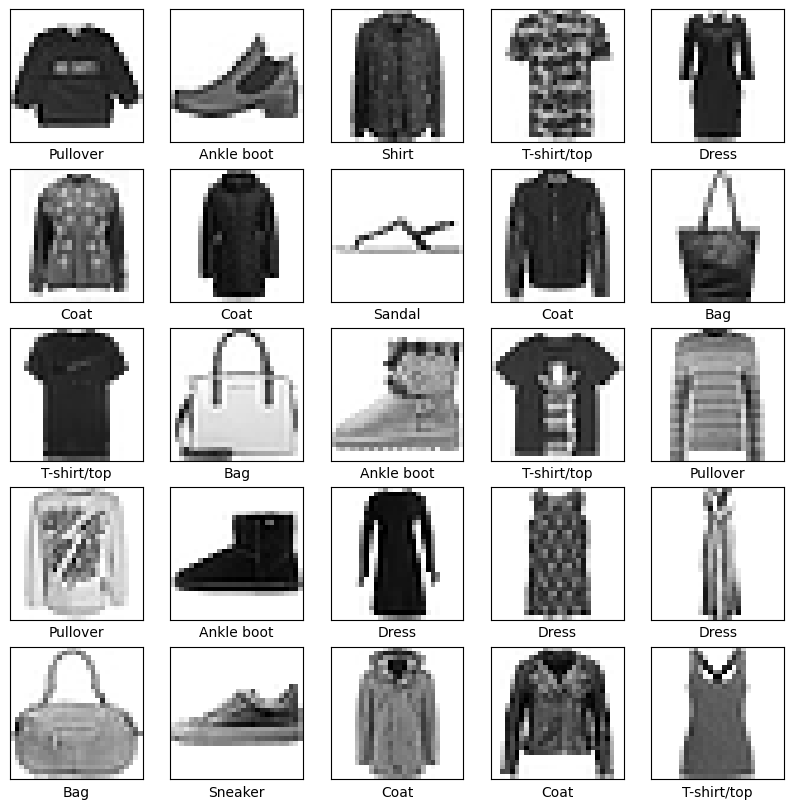

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

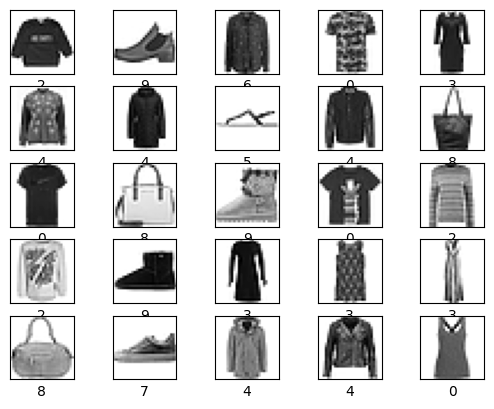

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout


In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                      

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
2/2 [==============================] - 5s 1s/step - loss: 2.2382 - accuracy: 0.1647 - val_loss: nan - val_accuracy: 0.4454
Epoch 2/50
2/2 [==============================] - 2s 884ms/step - loss: 1.9139 - accuracy: 0.4813 - val_loss: nan - val_accuracy: 0.5546
Epoch 3/50
2/2 [==============================] - 2s 886ms/step - loss: 1.6193 - accuracy: 0.5828 - val_loss: nan - val_accuracy: 0.5966
Epoch 4/50
2/2 [==============================] - 2s 825ms/step - loss: 1.3760 - accuracy: 0.6086 - val_loss: nan - val_accuracy: 0.6050
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 1.1787 - accuracy: 0.6429 - val_loss: nan - val_accuracy: 0.6639
Epoch 6/50
2/2 [==============================] - 5s 2s/step - loss: 1.0182 - accuracy: 0.6772 - val_loss: nan - val_accuracy: 0.7059
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 0.9001 - accuracy: 0.7182 - val_loss: nan - val_accuracy: 0.6975
Epoch 8/50
2/2 [==============================] - 2s 

In [ ]:
evaluation = model.evaluate(x_test,y_test)

74/74 [==============================] - 1s 12ms/step - loss: nan - accuracy: 0.8375


In [ ]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.8375052809715271


In [ ]:
y_probas = model.predict(x_test)

74/74 [==============================] - 1s 9ms/step


In [ ]:
y_pred = y_probas.argmax(axis=-1) #IMP

In [ ]:
y_pred

array([0, 1, 2, ..., 3, 6, 0])

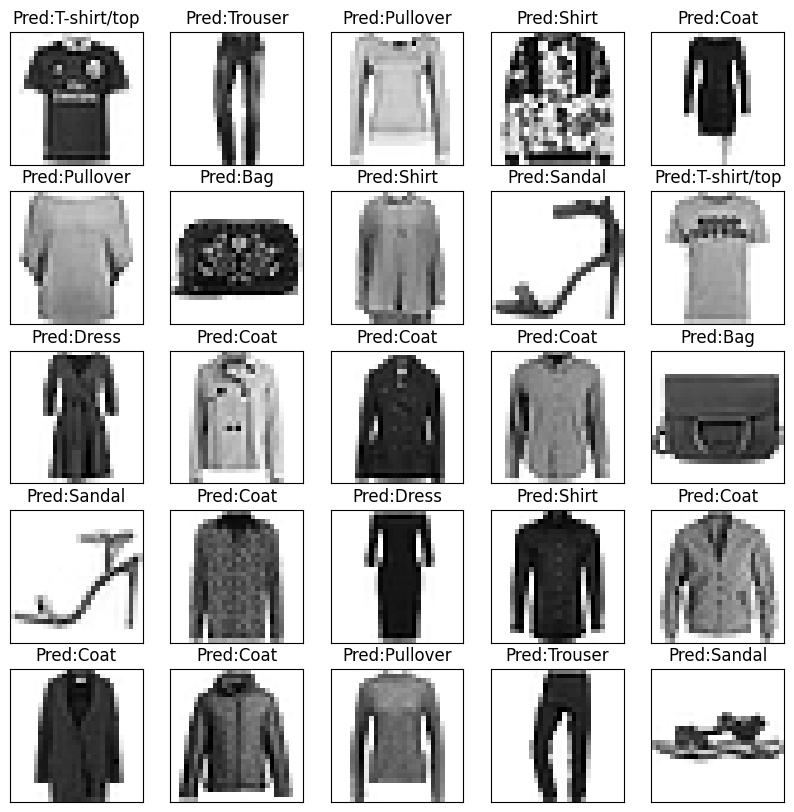

In [ ]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
# cr = classification_report(y_text, y_pred, target_names=["class 0", "class 1",...,"class 9"])
print(cr)

              precision    recall  f1-score   support

     class 0       0.81      0.79      0.80       235
     class 1       1.00      0.95      0.97       216
     class 2       0.72      0.71      0.72       238
     class 3       0.90      0.87      0.89       249
     class 4       0.70      0.82      0.76       233
     class 5       0.94      0.89      0.92       236
     class 6       0.64      0.60      0.62       250
     class 7       0.89      0.87      0.88       232
     class 8       0.94      0.93      0.94       229
     class 9       0.88      0.95      0.91       239

    accuracy                           0.84      2357
   macro avg       0.84      0.84      0.84      2357
weighted avg       0.84      0.84      0.84      2357



ASSIGNMENT 3

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


In [33]:
train_df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [34]:
test_df = pd.read_csv('/content/Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [35]:
# Extract the 'Open' prices
prices = train_df['Open'].values

In [36]:
# Perform data scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))


In [37]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [38]:
# Define the function to create input-output pairs
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)


In [39]:
# Set the sequence length
sequence_length = 60


In [40]:
# Create training sequences
x_train, y_train = create_sequences(train_data, sequence_length)


In [41]:
# Create testing sequences
x_test, y_test = create_sequences(test_data, sequence_length)


In [43]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [45]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [46]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
30/30 [==============================] - 4s 36ms/step - loss: 0.0236
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0023
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0014
Epoch 4/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0011
Epoch 5/10
30/30 [==============================] - 1s 26ms/step - loss: 0.0010
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 9.3810e-04
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 8.6772e-04
Epoch 8/10
30/30 [==============================] - 0s 12ms/step - loss: 8.0364e-04
Epoch 9/10
30/30 [==============================] - 0s 13ms/step - loss: 7.6466e-04
Epoch 10/10
30/30 [==============================] - 0s 14ms/step - loss: 7.4595e-04


In [47]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print('Test Loss:', loss)

6/6 [==============================] - 0s 5ms/step - loss: 0.0011
Test Loss: 0.0011015230556949973


In [48]:
# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
# y_pred = model.predict(x_test)
# y_pred = scaler.inverse_transform(y_pred)


6/6 [==============================] - 0s 6ms/step


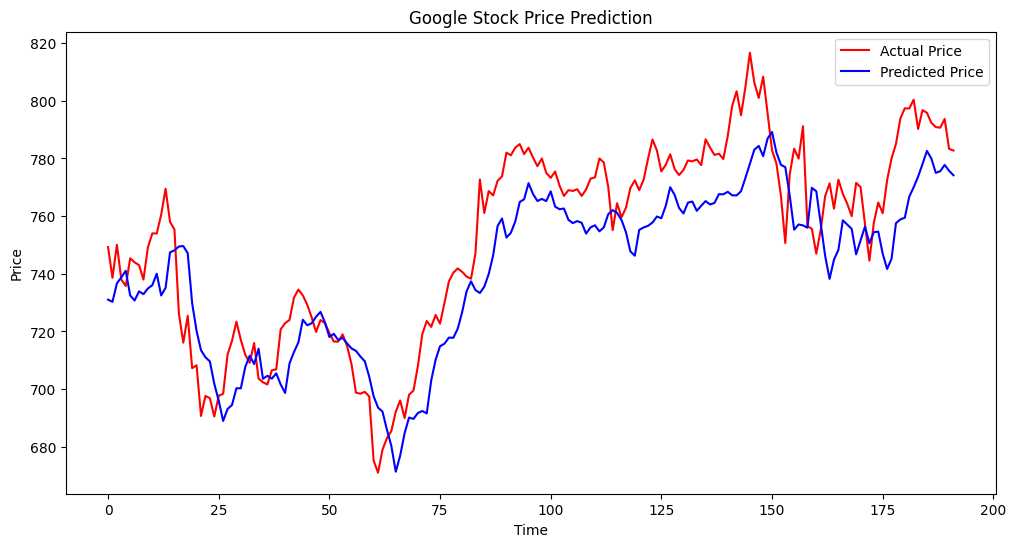

In [49]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
